In [305]:

import pandas as pd
import pyodbc

conn = pyodbc.connect("""DRIVER={SQL Server};
                            SERVER=DMT-KRK-L111;
                            DATABASE=DBTest;
                            Trusted_Connection=yes""") 
query = "SELECT TOP 1 * FROM UserInput"
df = pd.read_sql(query, conn)
material = pd.read_excel('Frezowanie rowkow.xlsx',sheet_name='Material')

Mat = df['Mat']
Mat_Selected = material[material['Mat_PN']==Mat.iloc[0]]
df['Rm'] = Mat_Selected['Rm'].iloc[0]
df['HB'] = Mat_Selected['HB'].iloc[0]
Rm = df['Rm']
HB = df['HB']

In [306]:
import pickle

In [307]:
with open('modelDT[Vc]', 'rb') as f:
    model1 = pickle.load(f)

with open('modelDT[pz]', 'rb') as f:
    model2 = pickle.load(f)
    
with open('modelDT[ks]', 'rb') as f:
    model3 = pickle.load(f)    
    
with open('modelDT[ap]', 'rb') as f:
    model4 = pickle.load(f)  

In [308]:
R = df['R']
G = df['G']
L = df['L']

Vc = model1.predict(df[['L', 'R', 'G', 'Rm', 'HB']])
pz = model2.predict(df[['L', 'R', 'G', 'Rm', 'HB']])
ks = model3.predict(df[['L', 'R', 'G', 'Rm', 'HB']])
ap = model4.predict(df[['L', 'R', 'G', 'Rm', 'HB']])

In [309]:
import math
n = Vc*1000/((math.pi)*df['R'])
f = pz * 2
Vf = f * n
Amax = 2 * pz * math.sqrt(ap / R)
IL = math.ceil((G + 1.5) / ap)
Tg = IL * L / Vf
Fs = ks * ap * f 
M = Fs * R / 2000
Ps = M * n /9554
Pe = Ps/0.6

In [310]:

newSeries = pd.Series(data=(Mat.iloc[0], Rm.iloc[0],HB.iloc[0],R.iloc[0],G.iloc[0],L.iloc[0],Vc[0],Vf.iloc[0],Ps.iloc[0],n.iloc[0],f[0],pz[0],ap[0],Amax[0],ks[0],Fs[0],M.iloc[0],Pe.iloc[0],IL,Tg.iloc[0]), index=('Mat','Rm','HB','R','G','L','Vc','Vf','Ps','n','f'
                               ,'pz','ap','Amax','ks','Fs','M','Pe', 'IL','Tg'))
df1 = df.append(newSeries, ignore_index=True)

In [311]:
df1

,R,G,L,Mat,Rm,HB,Amax,Fs,IL,M,Pe,Ps,Tg,Vc,Vf,ap,f,ks,n,pz
0,14.0,6.0,100.0,55,660,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.0,6.0,100.0,55,660,255,0.048456,1481.738136,6.0,10.372167,0.905061,0.543037,7.828192,22.0,76.646046,1.4,0.15323,6907.142857,500.20125,0.076615


Text(0.5, 1.0, 'Prędkość skrawania - regresja liniowa')

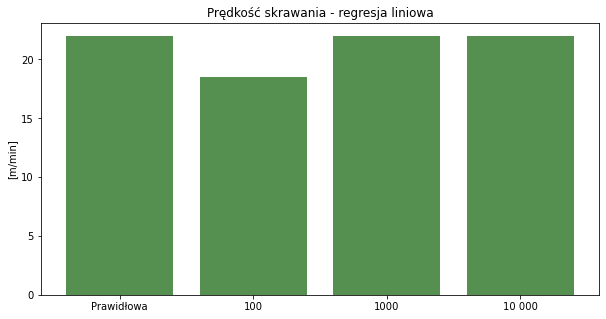

In [6]:
import numpy as np
import matplotlib.pyplot as plt
height = [22.0,18.48,22.0,22.0]
bars = ('Prawidłowa','100','1000','10 000')

y_pos = np.arange(len(height))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height, color = '#569050')
plt.xticks(y_pos, bars)


plt.ylabel('[m/min]')
plt.title('Prędkość skrawania - regresja liniowa')

In [237]:
Mat_Selected

,Nr,IDMat,Mat_PN,MatKod,Rm,HB,Km,Kc,Prop


Text(0.5, 1.0, 'Prędkość skrawania [100 rekordów]')

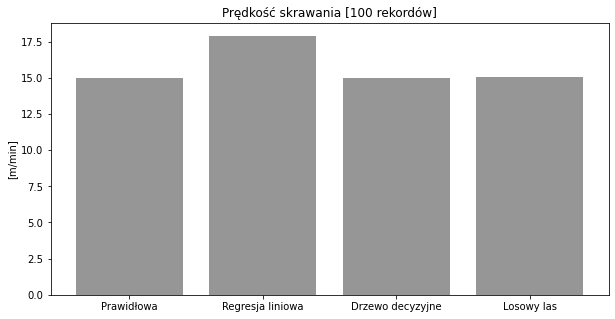

In [245]:
import numpy as np
import matplotlib.pyplot as plt
height = [15,17.9,15,15.07]
bars = ('Prawidłowa','Regresja liniowa','Drzewo decyzyjne','Losowy las')





y_pos = np.arange(len(height))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height, color = '#969696')
plt.xticks(y_pos, bars)


plt.ylabel('[m/min]')
plt.title('Prędkość skrawania [100 rekordów]')

Text(0.5, 1.0, 'Czas główny [100 rekordów]')

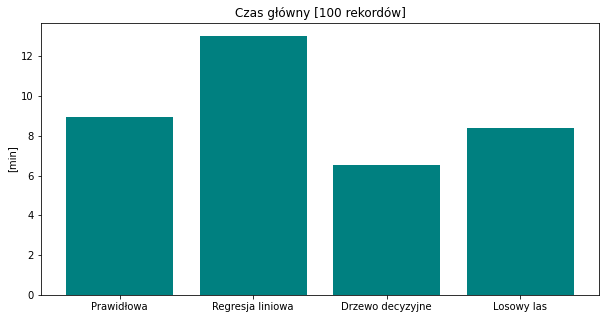

In [257]:
height = [8.95,13.02,6.52,8.38]
bars = ('Prawidłowa','Regresja liniowa','Drzewo decyzyjne','Losowy las')

y_pos = np.arange(len(height))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height, color = '#008080')
plt.xticks(y_pos, bars)


plt.ylabel('[min]')
plt.title('Czas główny [100 rekordów]')

Text(0.5, 1.0, 'Czas główny [100 rekordów]')

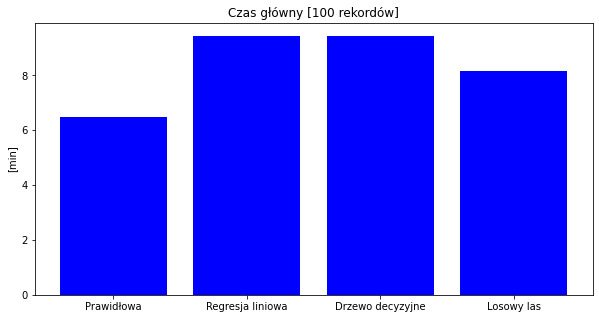

In [260]:

height = [6.5,9.42,9.44,8.16]
bars = ('Prawidłowa','Regresja liniowa','Drzewo decyzyjne','Losowy las')

y_pos = np.arange(len(height))
plt.figure(figsize=(10,5))
plt.bar(y_pos, height, color = '#0000FF')
plt.xticks(y_pos, bars)


plt.ylabel('[min]')
plt.title('Czas główny [100 rekordów]')